In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from property_anomaly_detector.features import read_df
from property_anomaly_detector.features import geospatial

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Overview

### The dataset

In [3]:
df = read_df()
df.head()

,num_floors,num_bedrooms,latitude,furnished_state,category,property_type,longitude,details_url,district,num_recepts,num_bathrooms,monthly_rental_price,shared_occupancy,postcode,area_name
0,1.0,2.0,51.541126,part_furnished,Residential,Flat,0.073507,https://www.zoopla.co.uk/to-rent/details/55071...,IG11,1.0,1.0,5850.0,N,IG,Ilford
1,0.0,0.0,51.540340,None,Residential,Retail premises,0.077076,https://www.zoopla.co.uk/to-rent/details/41801...,IG11,0.0,0.0,5000.0,N,IG,Ilford
2,0.0,3.0,51.537582,unfurnished,Residential,Flat,0.076489,https://www.zoopla.co.uk/to-rent/details/54952...,IG11,0.0,0.0,3500.0,N,IG,Ilford
3,0.0,6.0,51.540382,furnished,Residential,Terraced house,0.083914,https://www.zoopla.co.uk/to-rent/details/55087...,IG11,0.0,6.0,2800.0,N,IG,Ilford
4,0.0,2.0,51.541866,furnished,Residential,Terraced house,0.077420,https://www.zoopla.co.uk/to-rent/details/55074...,IG11,0.0,1.0,2490.0,N,IG,Ilford


### Numerical variables statistics

In [4]:
df.describe()

,num_floors,num_bedrooms,latitude,longitude,num_recepts,num_bathrooms,monthly_rental_price
count,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000
mean,0.117982,2.139043,51.514020,-0.163337,0.783634,1.366431,3275.106376
std,0.535030,1.366993,0.051880,0.104379,0.666257,1.015519,5724.021550
min,0.000000,0.000000,51.290470,-0.498257,0.000000,0.000000,40.000000
25%,0.000000,1.000000,51.484743,-0.211560,0.000000,1.000000,1425.000000
50%,0.000000,2.000000,51.512085,-0.171197,1.000000,1.000000,1993.000000
75%,0.000000,3.000000,51.546931,-0.109214,1.000000,2.000000,3120.000000
max,22.000000,18.000000,51.684320,0.395255,12.000000,13.000000,194226.000000


#### Amount of properties in the dataset : 68.324

## Categorical variables Analysis

<ul>
    <li>Furnished state</li>
    <li>Category</li>
    <li>Property type</li>
    <li>Shared occupancy</li>
    <li>District</li>
    <li>Postcode</li>
    <li>Area name</li>
</ul>
        

### Furnished state

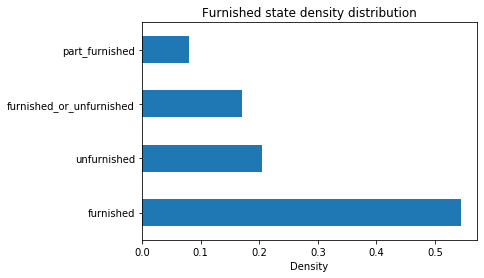

In [5]:
df['furnished_state'].value_counts(normalize=True).plot(kind="barh")
plt.title("Furnished state density distribution")

plt.xlabel("Density")
plt.show()

### Shared occupancy

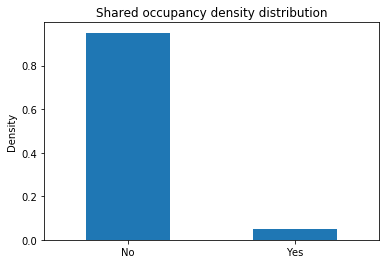

In [6]:
df['shared_occupancy'].map({'Y' : 'Yes', 'N' : 'No'}).value_counts(normalize=True).plot(kind="bar")

plt.title("Shared occupancy density distribution")
plt.ylabel("Density")
plt.xticks(rotation=0)

plt.show()

### Category

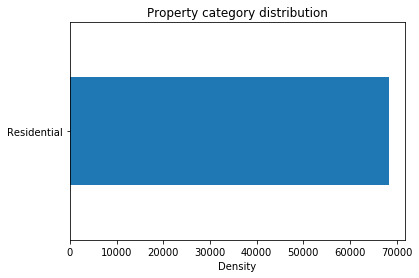

In [7]:
df['category'].value_counts().plot(kind="barh")

plt.xlabel("Density")

plt.title("Property category distribution")
plt.show()

There's only one category in the dataset : Residential. Consequently it has no substantial relevance over the analysis.

### Property type

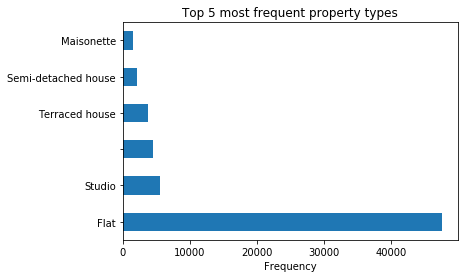

In [8]:
df['property_type'].value_counts()[:6].plot(kind='barh')

plt.title("Top 5 most frequent property types")
plt.xlabel("Frequency")
plt.show()

<p> As observed in the plot above, 4453(0.06%) properties have a property type defined as empty space. We'll replace it with NA.</p>

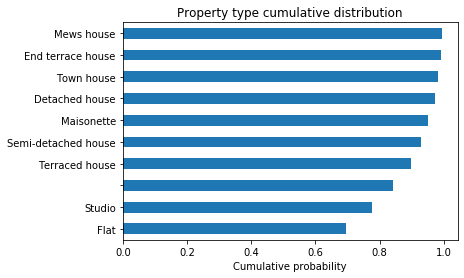

In [9]:
df['property_type'].value_counts(normalize=True).cumsum()[:10].plot(kind='barh')


plt.title("Property type cumulative distribution")
plt.xlabel("Cumulative probability")

plt.xticks(rotation=0)
plt.show()

<p>The cumulative sum of the TOP 2 most frequent properties (Out of 29) types are equal to 80% of the dataset.</p>
<p>The cumulative sum of the TOP 9 most frequent properties (Out of 29) types are equal to 99% of the dataset.</p>

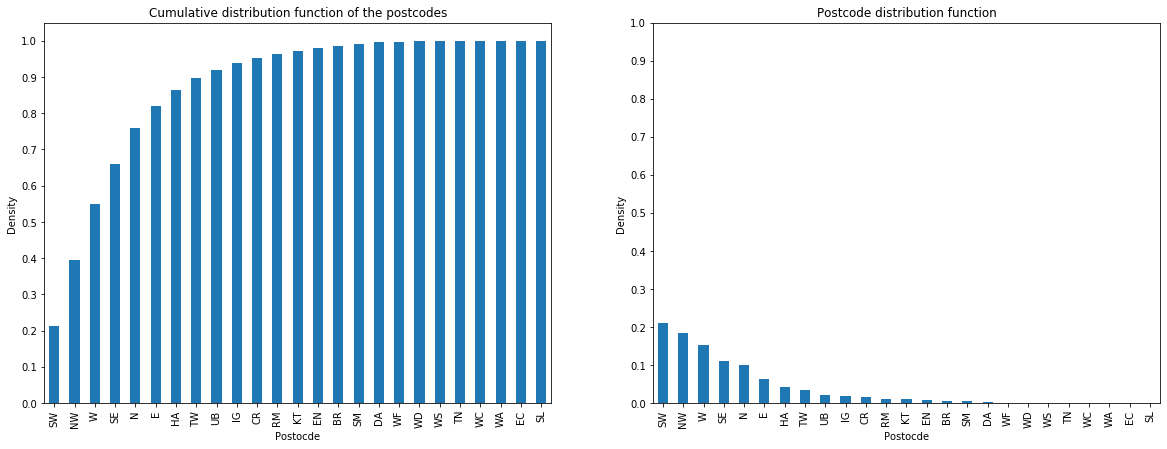

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

df['postcode'].value_counts(normalize=True).cumsum().plot(kind='bar', ax=ax[0])
ax[0].set_title("Cumulative distribution function of the postcodes")

ax[0].set_yticks(np.arange(0, 1.1, 0.1))

ax[0].set_xlabel("Postocde")
ax[0].set_ylabel("Density")

df['postcode'].value_counts(normalize=True).plot(kind='bar', ax=ax[1])
ax[1].set_title("Postcode distribution function")

ax[1].set_yticks(np.arange(0, 1.1, 0.1))

ax[1].set_xlabel("Postocde")
ax[1].set_ylabel("Density")
plt.show()

Top 16 equals to 99% of the dataset

## Numerical features analysis

### Pearson correlation heatmap

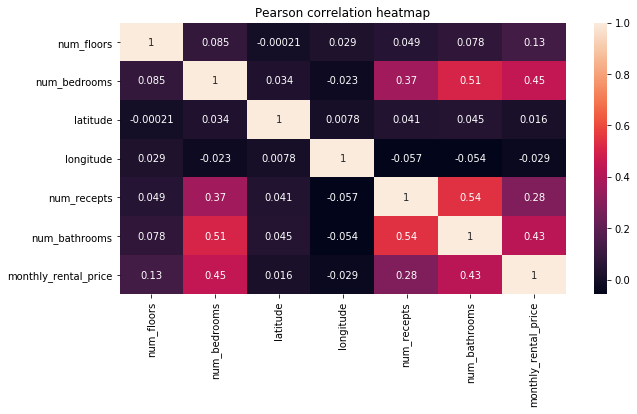

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, label='g')

plt.title("Pearson correlation heatmap")
plt.show()

<p> As showed above, there's not a single pair of numerical features with a high/low correlation value. </p>

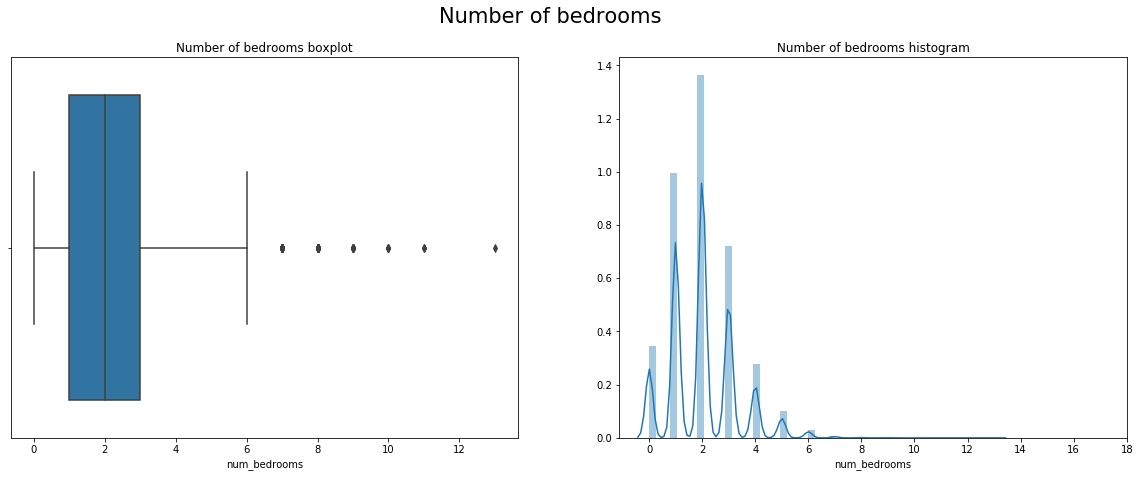

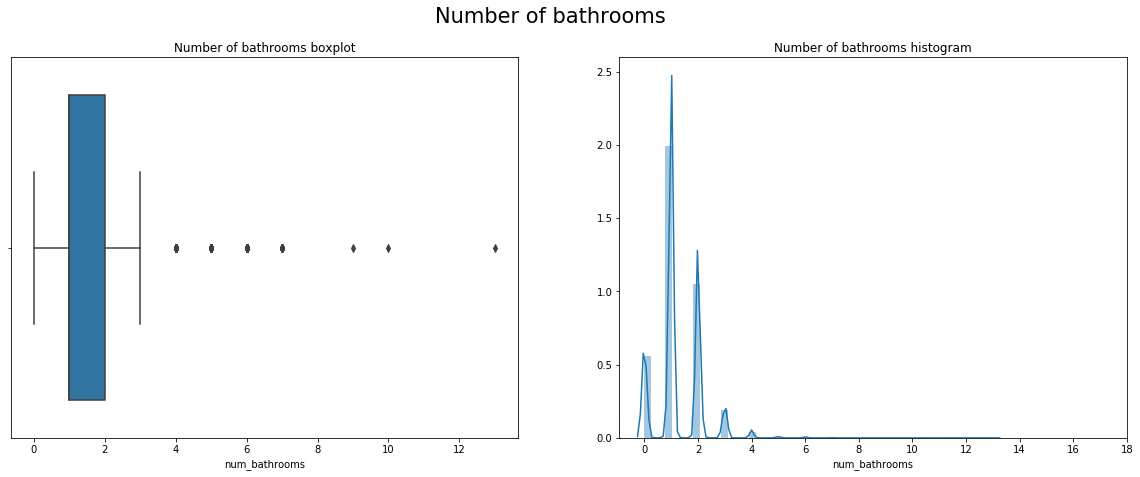

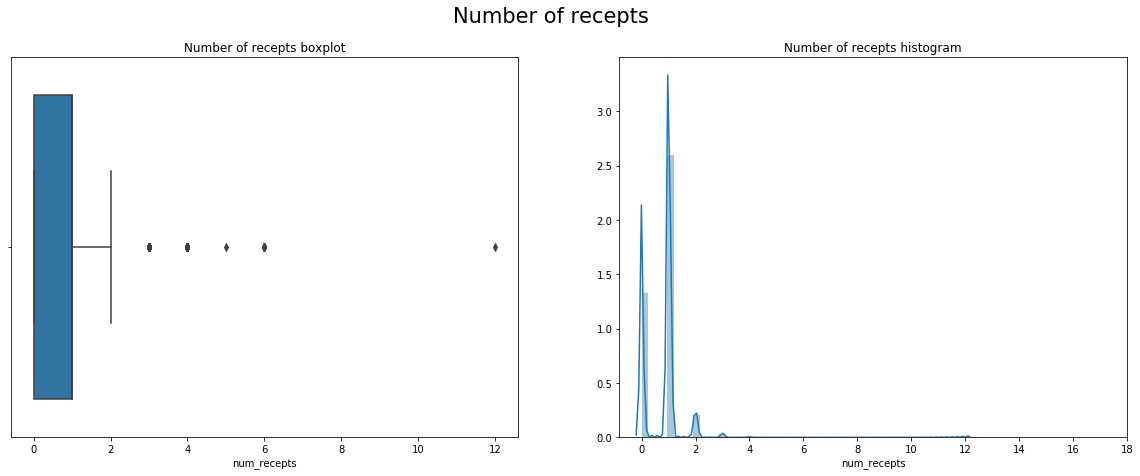

In [56]:
num_features = [('num_bedrooms', 'Number of bedrooms'), ('num_bathrooms', 'Number of bathrooms'), ('num_recepts' , 'Number of recepts')]
for feature_tupl in num_features:


    fig, ax = plt.subplots(1, 2, figsize=(20, 7))

    sns.boxplot(x=feature_tupl[0] , data=df, ax=ax[0])


    ax[0].set_title(f"{feature_tupl[1]} boxplot")


    sns.distplot(df[feature_tupl[0]], ax=ax[1])
    ax[1].set_xticks(np.arange(0, 19, 2))
    ax[1].set_title(f"{feature_tupl[1]} histogram")

    fig.suptitle(feature_tupl[1], fontsize=21)
    plt.show()


### Number of floors

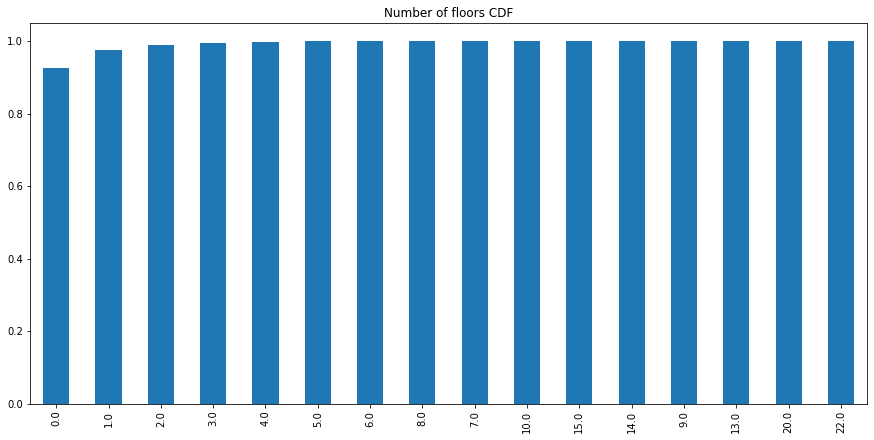

In [15]:
df['num_floors'].value_counts(normalize=True).cumsum().plot(kind='bar', figsize=(15,7))
plt.title("Number of floors CDF")
plt.show()

99% of the properties have less than 3 floors.

# Monthly rental price analysis

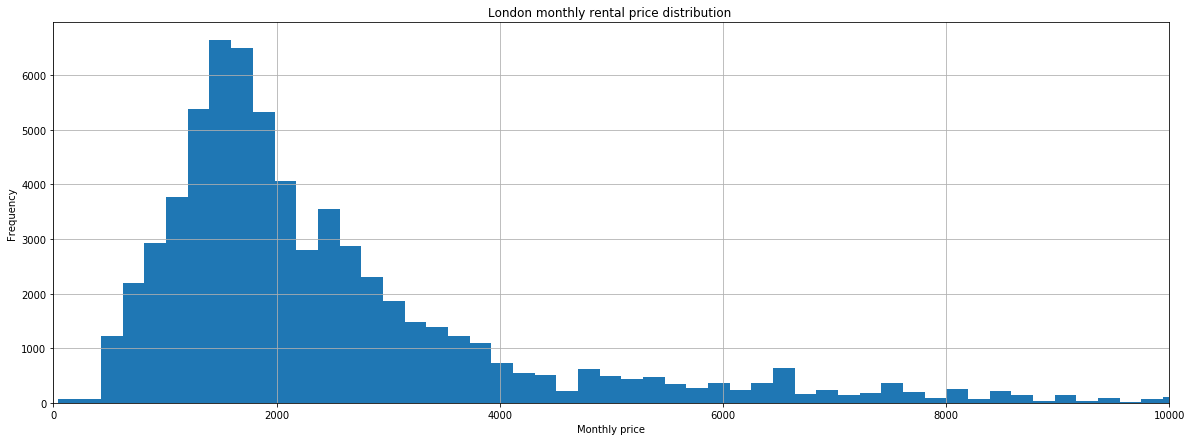

In [16]:
fig = plt.figure(figsize=(20, 7))

df['monthly_rental_price'].hist(bins=1000)

plt.xlim([0, 10000])
plt.title("London monthly rental price distribution ")
plt.xlabel("Monthly price")
plt.ylabel("Frequency")
plt.show()

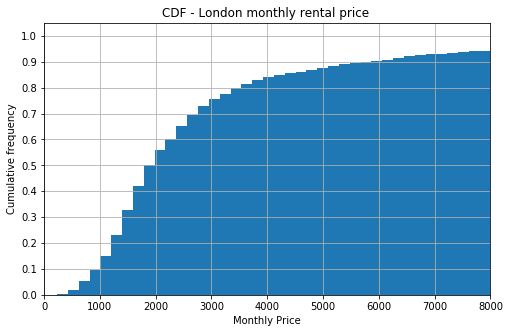

In [17]:
fig = plt.figure(figsize=(8, 5))

df['monthly_rental_price'].hist(bins=1000, cumulative=True, density=True)

plt.title("CDF - London monthly rental price ")
plt.xlim([0, 8000])

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Monthly Price")
plt.ylabel("Cumulative frequency")
plt.show()

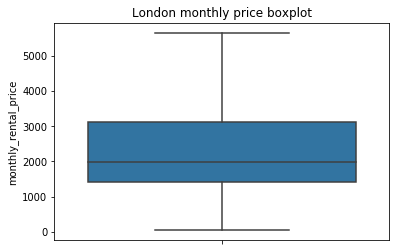

In [18]:
sns.boxplot(y="monthly_rental_price", data=df, showfliers=False)
plt.title("London monthly price boxplot")
plt.show()

In [ ]:
df = df[df['monthly_rental_price'] < 8000]
sns.pairplot(df, vars=["monthly_rental_price", "num_bedrooms", "num_bathrooms", "num_floors", "num_recepts" ], corner=True, kind="reg")
plt.show()

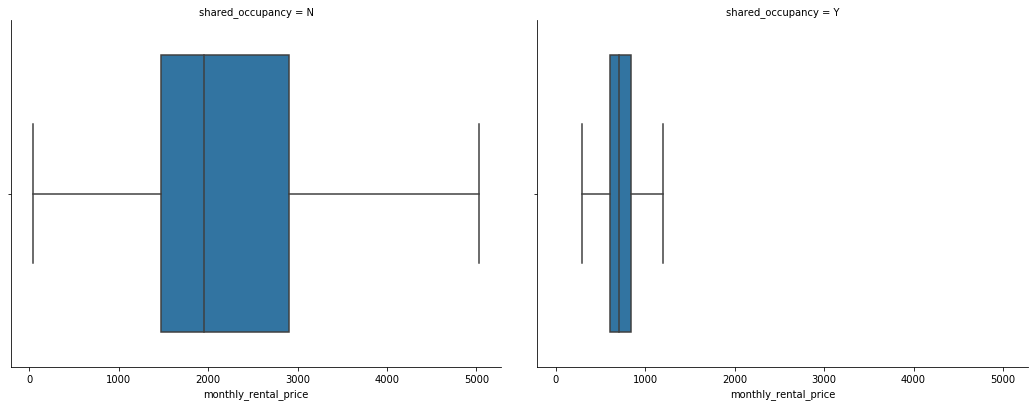

In [20]:
g = sns.FacetGrid(df, col="shared_occupancy")

g.map(sns.boxplot , "monthly_rental_price",  order=['Y', 'N'], showfliers=False)
g.fig.set_size_inches(15,7)
plt.show()


## Price by district

/home/marco/.local/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


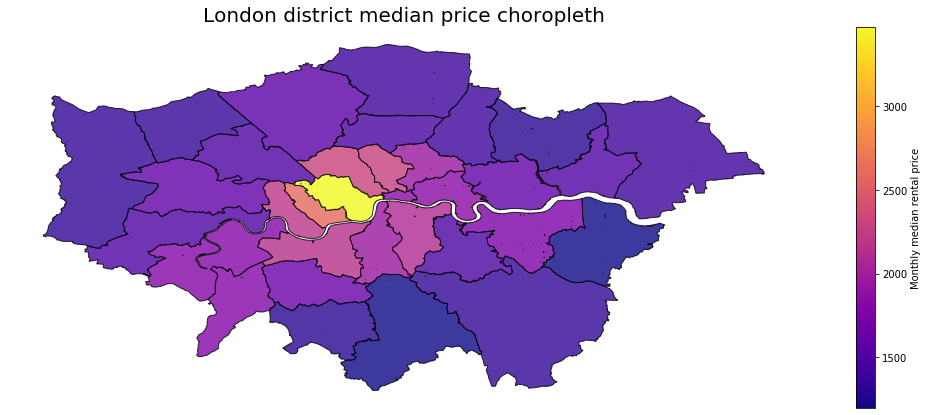

In [50]:
# fig, ax = plt.subplots(1, 1, figsize=(20, 7))
geospatial.plot_median_district_layer(df)

plt.title("London district median price choropleth", fontsize=20)
plt.show()

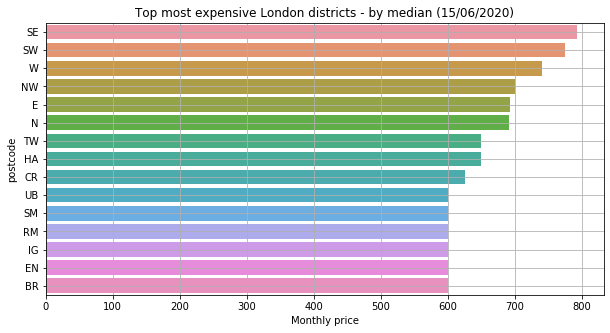

In [25]:
# Consider only the most relevant postcodes
# 16 equals to 99% of the data
df = df[df['shared_occupancy'] == 'Y']

cum_sum = df['postcode'].value_counts(normalize=True).cumsum() 
mask = cum_sum < 0.99


district_average_price = df[df['postcode'].isin(cum_sum[mask].index)].groupby("postcode")['monthly_rental_price'].apply(np.median)


district_average_price = district_average_price.sort_values(ascending=False)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x=district_average_price.values, y=district_average_price.index)
plt.title(f"Top most expensive London districts - by median (15/06/2020)")

plt.grid()
plt.xlabel("Monthly price")
plt.show()

This plot only considers postcode areas with a meaningful sample. WA, SL and EC for instance just have 1 property. Affecting the quality of the final results. 99% of the data is represented above.

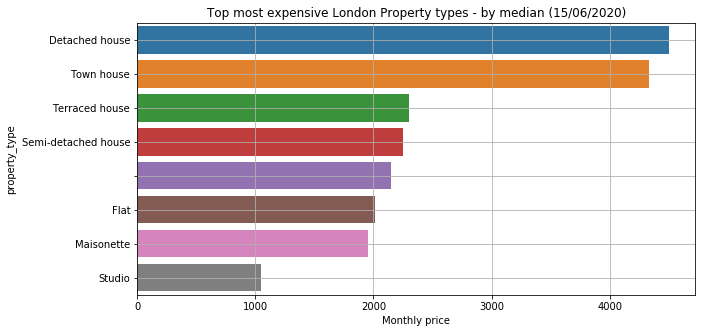

In [251]:
# Consider only the most relevant postcodes
# 16 equals to 99% of the data
cum_sum = df['property_type'].value_counts(normalize=True).cumsum() 
mask = cum_sum < 0.99

district_average_price = df[df['property_type'].isin(cum_sum[mask].index)].groupby("property_type")['monthly_rental_price'].apply(np.median)


district_average_price = district_average_price.sort_values(ascending=False)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x=district_average_price.values, y=district_average_price.index)
plt.title(f"Top most expensive London Property types - by median (15/06/2020)")

plt.grid()
plt.xlabel("Monthly price")
plt.show()

This plot only considers postcode areas with a meaningful sample. INSERT PROPERTY TYPES WITH SMALL AMOUNT OF PROPERTIES for instance just have 1 property. Affecting the quality of the final results. 99% of the data is represented above.